<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/R%20for%20Beginners/correlation_analysis_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)



# **Correlation Analysis in R**


## Introduction

Correlation is a statistical technique used to measure the degree of association between two continuous variables. It measures the linear relationship between two variables, indicating how closely they are related. A correlation coefficient ranges from -1 to +1, with a value of -1 indicating a perfect negative correlation, 0 indicating no correlation, and +1 indicating a perfect positive correlation. Correlation analysis is commonly used in many fields, including economics, finance, psychology, and social sciences, to help understand the relationship between variables and to make predictions based on that relationship.

The most common correlation coefficient is the **Pearson correlation** coefficient (denoted by $r$), and the formula is as follows:

$$ r = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^{n} (X_i - \bar{X})^2 \sum_{i=1}^{n} (Y_i - \bar{Y})^2}} $$

Where: -

$r$ is the Pearson correlation coefficient.

\- $X_i$ and $Y_i$ are the individual data points for the two variables.

-   $\bar{X}$ and $\bar{Y}$ are the means of the respective variables.

\- $n$ is the number of data points.

This formula calculates the correlation coefficient by dividing the covariance of the two variables by the product of their standard deviations. The correlation coefficient $r$ ranges from -1 to 1,

where:

\- $r = 1$ indicates a perfect positive linear relationship.

\- $= -1$ indicates a perfect negative linear relationship.

\- $r = 0$ indicates no linear relationship.

In practice, correlation coefficients close to 1 or -1 suggest a strong linear relationship, while coefficients close to 0 suggest a weak or no linear relationship.

However, it is important to note that correlation does not imply causation. This means that just because two variables are found to be correlated, it does not necessarily mean that one variable causes the other. There could be other factors involved that might influence the relationship between the two variables. Therefore, it is essential to exercise caution while interpreting correlation results and avoid making any causal inferences.

Performing correlation analysis in [R](https://www.r-project.org/), a powerful and versatile programming language for statistical computing and graphics, is a straightforward and efficient process. This tutorial will guide you through the following key steps:

1. Correlation Computation: We will calculate correlation coefficients between variables using the `cor()` function in R. Depending on your requirements, this function calculates Pearson, Spearman, or Kendall correlation coefficients.

2. Correlation Test: To test the significance of the correlation coefficient, we will use the `cor.test()` function.

3. Visualizing Correlation: Correlation matrices can be challenging to interpret at a glance. We will explore how to visualize correlation matrices using heatmaps, which provide a more intuitive understanding of the relationships between variables.

By the end of this tutorial, you will have a solid understanding of conducting correlation analysis in R. This will enable you to effectively explore relationships within your datasets and draw meaningful insights from your data.


## Install rpy2

Easy way to run R in Colab with Python runtime using **rpy2** python package. We have to install this package using the `pip` command:

In [ ]:
!pip uninstall rpy2 -y
! pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314934 sha256=ca2b439d7bf6feb827dd0baa5c6fad131d850c24a921e016995323e8a2ed9200
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2


##  Mount Google Drive

Then you must create a folder in Goole drive named "R" to install all packages permanently. Before installing R-package in Python runtime. You have to mount Google Drive and follow on-screen instruction:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Check and Install Required R Packages

In these exercise we will use following R-Packages:

[tydyverse](https://www.tidyverse.org/): The tidyverse is a collection of R packages designed for data science.

[Hmisc](https://cran.r-project.org/web/packages/Hmisc/Hmisc.pdf): Contains many functions useful for data analysis, high-level graphics, utility operations,

[corrplot](https://cran.r-project.org/web/packages/corrplot/vignettes/corrplot-intro.html):R package corrplot provides a visual exploratory tool on correlation matrix

[ggstatsplot](https://indrajeetpatil.github.io/ggstatsplot/): ggplot2 based lots with statistical details

[GGally](https://ggobi.github.io/ggally/): GGally extends ggplot2 by adding several functions to reduce the complexity of combining geoms with transformed data.

[ggExtra](https://cran.r-project.org/web/packages/ggExtra/vignettes/ggExtra.html):Add marginal histograms to ggplot2

[ggside](https://cran.r-project.org/web/packages/ggside/vignettes/ggside_basic_usage.html): The package ggside was designed to enable users to add metadata to their ggplots with ease.

[patchwork](https://patchwork.data-imaginist.com/):The goal of patchwork is to make it ridiculously simple to combine separate ggplots into the same graphic.

[gridExtra](https://cran.r-project.org/web/packages/gridExtra/vignettes/arrangeGrob.html):The grid package provides low-level functions to create graphical objects (grobs), and position them on a page in specific viewports.

[rstatix](https://rpkgs.datanovia.com/rstatix/): Provides a simple and intuitive pipe-friendly framework, coherent with the 'tidyverse' design philosophy, for performing basic statistical tests, including t-test, Wilcoxon test, ANOVA, Kruskal-Wallis and correlation analyses.



In [ ]:
! pip install pycairo
! pip install pkgconfig

In [ ]:
%%R
pkg <- c('tidyverse',
         'plyr',
         'rstatix',
         'Hmisc',
         'corrplot',
         'GGally',
         'ggExtra',
         'ggside',
         'patchwork',
         'gridExtra',
         'report'
           )
new.packages <- pkg[!(pkg %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

### Install 'ggstatsplot'

In [ ]:
!sudo apt install cmake
!sudo apt install libcairo2-dev
!sudo apt install libgmp-dev
!sudo apt-get install libmpfr-dev

In [ ]:
%%R
install.packages(c("gmp", "Rmpfr", "PMCMRplus",'hrbrthemes'), lib='drive/My Drive/R/')
install.packages("ggstatsplot", lib='drive/My Drive/R/')

## Load Packages

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
library(tidyverse)
library(plyr)
library(ggstatsplot)
library(ggExtra)
library(gridExtra)
library(xtable)
library(GGally)
library(Hmisc)
library(corrplot)
library(patchwork)
library(rstatix)


## Data

The data set use in this exercise can be downloaded from my [Dropbox](https://www.dropbox.com/scl/fo/fohioij7h503duitpl040/h?rlkey=3voumajiklwhgqw75fe8kby3o&dl=0) or from my [Github](https://github.com/zia207/r-colab/tree/main/Data/R_Beginners) account.



We will use `read_csv()` function of **readr** package to import data from github as a **tidy** data.

In [ ]:
%%R
mf<-read_csv("https://github.com/zia207/r-colab/raw/main/Data/Regression_analysis/gp_soil_data.csv")

Rows: 467 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): STATE, COUNTY, NLCD, FRG
dbl (15): ID, FIPS, STATE_ID, Longitude, Latitude, SOC, DEM, Aspect, Slope, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Pearson Correlation

The Pearson correlation is a statistical method that helps to determine the strength and direction of the relationship between two continuous variables. It's a widely used technique in various fields, such as social sciences, finance, and engineering. This method, also known as **\*\*Pearson's r\*\*** or the Pearson product-moment correlation coefficient, calculates the degree to which two variables are related. In other words, it measures how much one variable changes when the other variable changes and the formula is as follows:

$$ r = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^{n} (X_i - \bar{X})^2 \sum_{i=1}^{n} (Y_i - \bar{Y})^2}} $$


Where: -

-   $r$ is the Pearson correlation coefficient.

-   $X_i$ and $Y_i$ are the individual data points for the two variables.

-   $\bar{X}$ and $\bar{Y}$ are the means of the respective variables.

-   $n$ is the number of data points.


We can calculate the Pearson correlation coefficient using the `cor()` function. method is a character string indicating which correlation coefficient (or covariance) is to be computed. One of `pearson` (default),`kendall`, or `spearman` can be abbreviated. Here's an example:

In [ ]:
%%R
mf |>  dplyr::select(SOC, NDVI)  |>
      cor(method = "pearson")

           SOC      NDVI
SOC  1.0000000 0.5870452
NDVI 0.5870452 1.0000000


### Nonparametric Correlations

Nonparametric correlations provide a flexible approach for measuring the relationship between two variables. Unlike traditional parametric methods, which assume that the relationship between variables follows a particular pattern, nonparametric correlations do not make such assumptions. This makes them ideal for use when the analyzed variables are not normally distributed, or the relationship between them is not linear. These measures of association are essential tools in statistical analysis, as they help to identify patterns and trends in data that may not be immediately apparent from simple descriptive statistics. Nonparametric correlations enable researchers and analysts to make more informed decisions based on their data by providing a more nuanced understanding of the relationship between variables.

Two commonly used nonparametric correlation measures are **Spearman's rank** correlation coefficient and **Kendall's tau** correlation coefficient.


#### Spearman's rank correlation

Spearman's rank correlation coefficient is a non-parametric measure of the strength and direction of monotonic (non-linear) relationships between two variables. In Spearman's rank correlation, the data is first converted into ranks, and then the correlation is calculated based on the ranks. The formula for Spearman's rank correlation coefficient $\rho$ is as follows:

$$ \rho = 1 - \frac{6\sum d_i^2}{n(n^2 - 1)} $$

Where: - $\rho$ is Spearman's rank correlation coefficient. - $d_i$ is the difference between the ranks of corresponding pairs of observations. - $n$ is the number of pairs of observations.

The calculation involves summing the squared differences between the ranks of corresponding pairs of observations and then applying the formula to obtain the correlation coefficient.

The coefficient ranges from -1 to 1,

where:

-   $\rho = 1$ indicates a perfect monotonic increasing relationship.

-   $\rho = -1$ indicates a perfect monotonic decreasing relationship.

-   $\rho = 0$ indicates no monotonic relationship.

Spearman's rank correlation is often used when the assumption of linearity in Pearson correlation is not met or when dealing with ordinal data.


An **ordinal scale** is a type of measurement scale used in statistics and research that categorizes data into distinct, ordered categories. In this scale, the categories possess a clear order or rank, but the differences between the categories are not precisely measurable or equal.

A **nominal scale** is a categorical measurement scale used in statistics and research that categorizes data into distinct, non-numeric categories or groups without any intrinsic order or rank

In [ ]:
%%R
mf  |>  dplyr::select(SOC, NDVI)  |>
      cor(method = "spearman")

          SOC     NDVI
SOC  1.000000 0.648452
NDVI 0.648452 1.000000



#### Kendall's tau correlation

Kendall's Tau correlation coefficient, often denoted as $\tau$, is another non-parametric measure of association that assesses the strength and direction of the relationship between two variables. It is based on comparing the number of concordant and discordant pairs of observations. The formula for Kendall's Tau is as follows:

$$ \tau = \frac{{\text{{Number of concordant pairs}} - \text{{Number of discordant pairs}}}}{{\frac{1}{2} n (n - 1)}} $$

Where: - $\tau$ is Kendall's Tau correlation coefficient. - $n$ is the number of pairs of observations. - The number of concordant pairs is the count of pairs for which the ranks have the same order in both variables. - The number of discordant pairs is the count of pairs for which the ranks have different orders in the two variables.

The value of ( $\tau$ ) ranges from -1 to 1,

where:

-   $\tau = 1$ indicates a perfect positive relationship

-   $\tau = -1$ indicates a perfect negative relationship.

-   $\tau = 0$ indicates no association.

**Concordant** typically refers to a situation or data in which two or more items or sets of data align or agree with each other. In statistics or research, concordant data points or results show consistency or agreement in their characteristics, patterns, or relationships.

**Discordant** refers to a situation where two or more items or sets of data do not align or agree with each other. In statistical analysis or research, discordant data points or results indicate inconsistency or disagreement in their characteristics, patterns, or relationships.

Kendall's Tau is particularly useful when dealing with ordinal data or when the assumption of linearity in Pearson correlation is not met. It measures the strength of a monotonic relationship between variables.



In [ ]:
%%R
mf  |>  dplyr::select(SOC, NDVI)  |>
      cor(method = "kendall")

           SOC      NDVI
SOC  1.0000000 0.4616806
NDVI 0.4616806 1.0000000


### Correlation Test

The `cor.test()` function is used to test the significance of the correlation coefficient between two variables (both r-and p-values):


In [ ]:
%%R
cor.test(mf$SOC, mf$NDVI)


	Pearson's product-moment correlation

data:  mf$SOC and mf$NDVI
t = 15.637, df = 465, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5242311 0.6435059
sample estimates:
      cor 
0.5870452 



The correlation coefficient between SOC and Fe is 0.3149, and that the p-value of the test is \< 2.2e-16, indicating that there is a significant correlation between SOC and Fe at the alpha level of 0.05.

### Correlation by Group

We can also calculate spearman correlation coefficients between SOC and Fe in different landcovers. will We will use `ddply()` function of **plyr** package which split data frame, apply function, (here cor()), and return r-values in a data frame using summarise argument



In [ ]:
%%R -w 400 -h 400 -u px
plyr::ddply(mf, "NLCD",
            summarise,
            corr=cor(SOC, NDVI, method = "spearman"))


                NLCD      corr
1             Forest 0.4053550
2         Herbaceous 0.5353354
3 Planted/Cultivated 0.4803166
4          Shrubland 0.5773881


### Scatter Plot

A scatter plot is a type of graph used to display the relationship between two continuous variables. This plot is commonly used in data analysis to explore and visualize the relationship between two variables. They are particularly useful in identifying patterns or trends in data, as well as in identifying outliers or unusual observations.

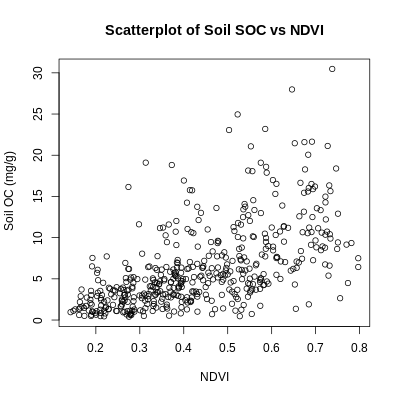

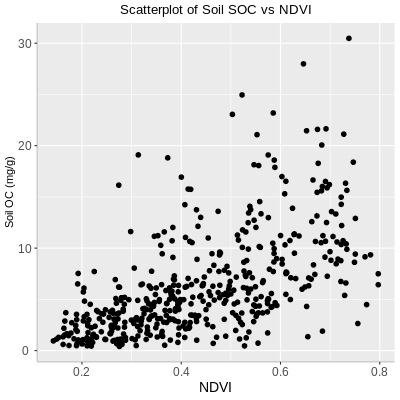

In [ ]:
%%R -w 400 -h 400 -u px

# with plot() function
plot(mf$NDVI, mf$SOC,
    # x-axis label
    xlab="NDVI",
    # y-axis label
    ylab=" Soil OC (mg/g)",
    # Plot title
    main="Scatterplot of Soil SOC vs NDVI")

 # With ggplot geom_point()

 ggplot(mf, aes(x=NDVI, y=SOC)) +
  geom_point(size=2) +
  # add plot title
  ggtitle("Scatterplot of Soil SOC vs NDVI") +
   theme(
    # center the plot title
    plot.title = element_text(hjust = 0.5),
    axis.line = element_line(colour = "gray"),
    # axis title font size
    axis.title.x = element_text(size = 14),
    # X and  axis font size
    axis.text.y=element_text(size=12,vjust = 0.5, hjust=0.5),
    axis.text.x = element_text(size=12))+
     xlab("NDVI") +
     ylab("Soil OC (mg/g)")


#### Scatter plot by group

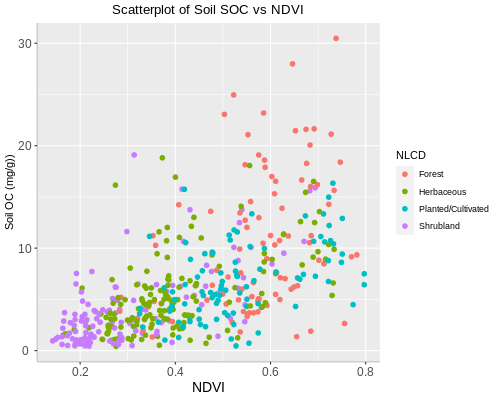

In [ ]:
%%R -w 500 -h 400 -u px

ggplot(mf, aes(x=NDVI, y=SOC, color=NLCD)) +
  geom_point(size=2) +
# add plot title
  ggtitle("Scatterplot of Soil SOC vs NDVI") +
   theme(
    # center the plot title
    plot.title = element_text(hjust = 0.5),
    axis.line = element_line(colour = "gray"),
    # axis title font size
    axis.title.x = element_text(size = 14),
    # X and  axis font size
    axis.text.y=element_text(size=12,vjust = 0.5, hjust=0.5),
    axis.text.x = element_text(size=12))+
      # add legend tittle
  guides(color = guide_legend(title = "NLCD"))+
  xlab("NDVI") +
  ylab("Soil OC (mg/g))")

#### Bubble Plot

A bubble plot is a type of chart that displays data points in a 3-dimensional space using bubbles or spheres. The chart is similar to a scatter plot, but each data point is represented by a bubble with a size proportional to a third variable. Bubble plots are useful for displaying relationships between three variables and can be particularly effective when used to visualize large datasets.

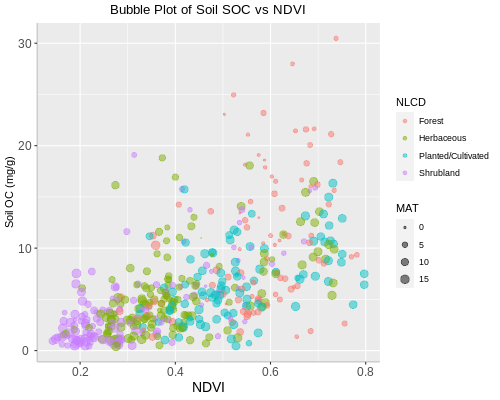

In [ ]:
%%R  -w 500 -h 400 -u px

mf  |>
  arrange(desc(SOC))  |>
  mutate(NLCD = factor(NLCD))  |>
  ggplot(aes(x=NDVI, y=SOC, size = MAT, color=NLCD)) +
    geom_point(alpha=0.5) +
    scale_size(range = c(.2, 4), name="MAT")+
     guides(color = guide_legend(title = "NLCD"))+
  ggtitle("Bubble Plot of Soil SOC vs NDVI") +
   theme(
    # center the plot title
    plot.title = element_text(hjust = 0.5),
    axis.line = element_line(colour = "gray"),
    # axis title font size
    axis.title.x = element_text(size = 14),
    # X and  axis font size
    axis.text.y=element_text(size=12,vjust = 0.5, hjust=0.5),
    axis.text.x = element_text(size=12))+
      # add legend tittle
  guides(color = guide_legend(title = "NLCD")) +
  xlab("NDVI") +
  ylab("Soil OC (mg/g)")


### Mariginal Plot

A marginal plot is a type of visualization that displays the distribution of a single variable along the margins of a scatterplot. It is a useful tool for exploring the relationship between two variables and can provide additional insights into the data. We will use `ggMarginal()` function from **ggExtra** library makes it create marginal plots

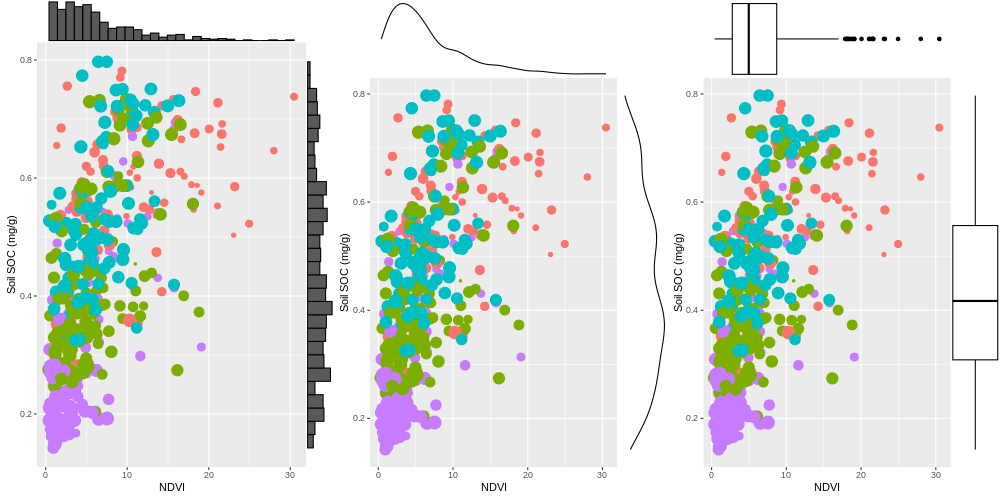

In [ ]:
%%R  -w 1000 -h 500 -u px

p<-ggplot(mf, aes(x=SOC, y=NDVI, color=NLCD, size=MAT)) +
      geom_point() +
      theme(legend.position="none") +
      xlab("NDVI") + ylab("Soil SOC (mg/g)")
p_hist <- ggMarginal(p, type="histogram", size=10)
# marginal density
p_dens <- ggMarginal(p, type="density")
# marginal boxplot
p_box <- ggMarginal(p, type="boxplot")
grid.arrange(p_hist, p_dens, p_box, ncol=3)

### Marginal Plot with Statistical Results

`ggscatterstats()` function from **ggstatsplot** will create scatterplots from ggplot2 combined with marginal densigram (density + histogram) plots with statistical details.

  method from  
  +.gg   GGally



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


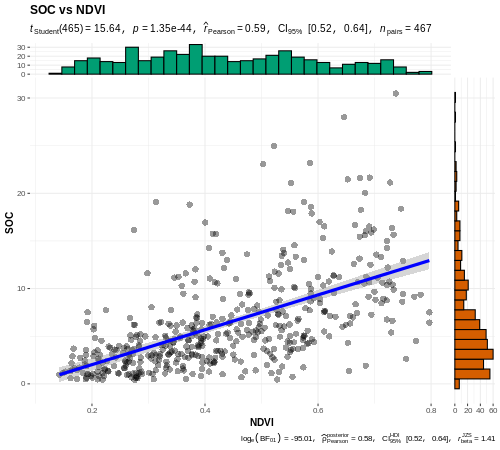

In [ ]:
%%R  -w 500 -h 450 -u px

ggstatsplot::ggscatterstats(
  data = mf,
  x = NDVI,
  y = SOC,
  title = "SOC vs NDVI",
  messages = FALSE
)

### Correlation Matrix

A correlation matrix is a table that displays the correlation coefficients between different variables.

The `rcorr()` function of **Hmisc** package computes a matrix of Pearson's r or Spearman's rho rank correlation coefficients for all possible pairs of columns of a matrix.

In [ ]:
%%R
# create a data frame for correlation analysis
df.cor<-mf %>% dplyr::select(SOC, DEM, Slope, TPI, NDVI, MAP, MAT)
# correlation matrix
cor.mat<-Hmisc::rcorr(as.matrix(df.cor, type="pearson"))
cor.mat

        SOC   DEM Slope   TPI  NDVI   MAP   MAT
SOC    1.00  0.17  0.40  0.04  0.59  0.50 -0.36
DEM    0.17  1.00  0.70  0.00 -0.07 -0.31 -0.81
Slope  0.40  0.70  1.00 -0.01  0.31  0.15 -0.64
TPI    0.04  0.00 -0.01  1.00  0.07  0.14  0.00
NDVI   0.59 -0.07  0.31  0.07  1.00  0.80 -0.21
MAP    0.50 -0.31  0.15  0.14  0.80  1.00  0.06
MAT   -0.36 -0.81 -0.64  0.00 -0.21  0.06  1.00

n= 467 


P
      SOC    DEM    Slope  TPI    NDVI   MAP    MAT   
SOC          0.0003 0.0000 0.3745 0.0000 0.0000 0.0000
DEM   0.0003        0.0000 0.9559 0.1404 0.0000 0.0000
Slope 0.0000 0.0000        0.7940 0.0000 0.0016 0.0000
TPI   0.3745 0.9559 0.7940        0.1201 0.0017 0.9187
NDVI  0.0000 0.1404 0.0000 0.1201        0.0000 0.0000
MAP   0.0000 0.0000 0.0016 0.0017 0.0000        0.1922
MAT   0.0000 0.0000 0.0000 0.9187 0.0000 0.1922       


We can create a correlation matrix table with correlation coefficients (r) and with significat P-values using following function:

In [ ]:
%%R
library(xtable)

cor_table <- function(x){
  require(Hmisc)
  x <- as.matrix(x)
  R <- rcorr(x)$r
  p <- rcorr(x)$P

  ## define notions for significance levels; spacing is important.
  mystars <- ifelse(p < .001, "***", ifelse(p < .01, "** ", ifelse(p < .05, "* ", " ")))

  ## trunctuate the matrix that holds the correlations to three decimal
  R <- format(round(cbind(rep(-1.11, ncol(x)), R), 3))[,-1]

  ## build a new matrix that includes the correlations with their apropriate stars
  Rnew <- matrix(paste(R, mystars, sep=""), ncol=ncol(x))
  diag(Rnew) <- paste(diag(R), " ", sep="")
  rownames(Rnew) <- colnames(x)
  colnames(Rnew) <- paste(colnames(x), "", sep="")

  ## remove upper triangle
  Rnew <- as.matrix(Rnew)
  Rnew[upper.tri(Rnew, diag = TRUE)] <- ""
  Rnew <- as.data.frame(Rnew)

  ## remove last column and return the matrix (which is now a data frame)
  Rnew <- cbind(Rnew[1:length(Rnew)-1])
  return(Rnew)
}

In [ ]:
%%R
cor_table(df.cor)

            SOC       DEM     Slope       TPI      NDVI     MAP
SOC                                                            
DEM    0.167***                                                
Slope  0.405***  0.703***                                      
TPI      0.041    -0.003    -0.012                             
NDVI   0.587***   -0.068   0.311***    0.072                   
MAP    0.499*** -0.308***  0.146**   0.145**   0.804***        
MAT   -0.358*** -0.808*** -0.638***    0.005  -0.210***  0.060 


#### Pairs Plots

The function `ggpairs()` from **GGally** leverages a modular design of pairwise comparisons of multivariate data and displays either the density or count of the respective variable along the diagonal.

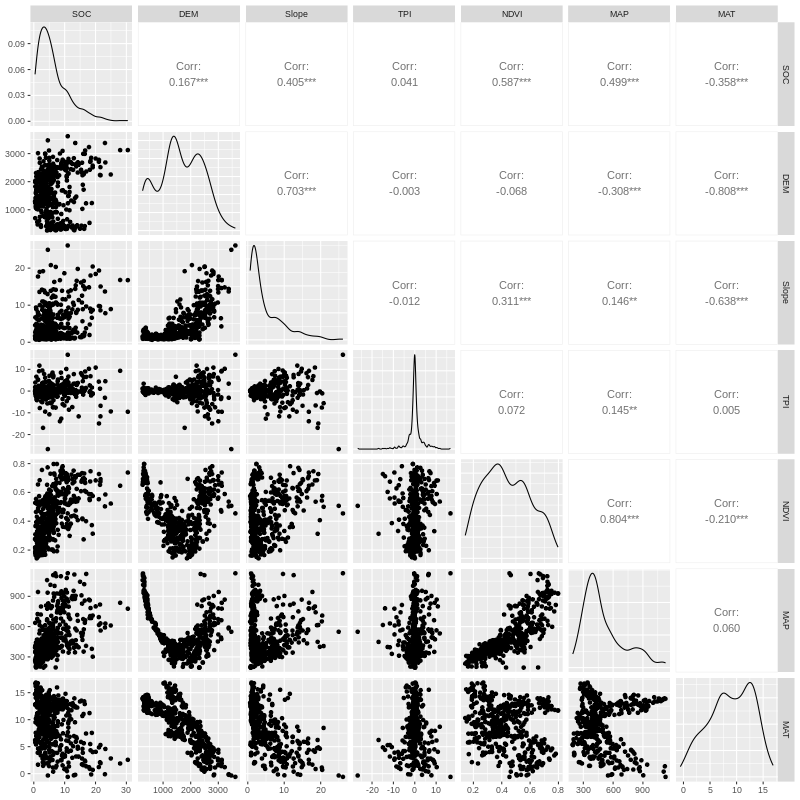

In [ ]:
%%R  -w 800 -h 800 -u px
GGally::ggpairs(df.cor)

#### Correlation Matrix Plots

You can create a graphical display of a correlation matrix using the function `corrplot()` of **corrplot** package. The function corrplot() takes the correlation matrix as the first argument. The second argument (type="upper") is used to display only the upper triangular of the correlation matrix. The correlation matrix is reordered according to the correlation coefficient using **"hclust"** method.

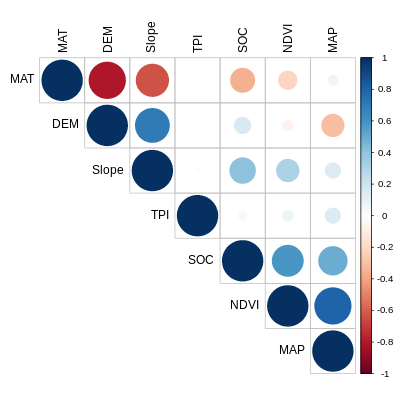

In [ ]:
%%R -w 400 -h 400 -u px
corrplot(cor.mat$r,
         type="upper",
         order="hclust",
         cex.lab = 0.5,
         tl.col = "black",
         p.mat = cor.mat$p,
         sig.level = 0.05, insig = "blank")

In above plot, correlation coefficients are colored according to the value. Correlation matrix can be also reordered according to the degree of association between variables. Positive correlations are displayed in blue and negative correlations in red color. Color intensity and the size of the circle are proportional to the correlation coefficients. In the right side of the correlogram, the legend color shows the correlation coefficients and the corresponding colors. The correlations with `p-value` \> 0.05 are considered as insignificant. In this case the correlation coefficient values are leaved blank.

## **Correlation analysis with rstatix**

The 'rstatix' package is a user-friendly tool that follows the 'tidyverse' design philosophy to perform basic statistical tests, including 't-test', 'Wilcoxon test', 'ANOVA', 'Kruskal-Wallis' and 'correlation analyses' with ease. The output of each test is transformed into a tidy data frame for easy visualization. Additional functions are included to help with the analysis of factorial experiments, including purely ‘within-Ss’ designs (repeated measures), purely ‘between-Ss’ designs, and mixed ‘within-and-between-Ss’ designs. The package also provides several effect size metrics, such as 'eta squared' for ANOVA, 'Cohen’s d' for t-test, and 'Cramer’s V' for the association between categorical variables. Additionally, the package includes helper functions to identify univariate and multivariate outliers, assess normality, and homogeneity of variance.

Computing correlation:

`cor_test()`: correlation test between two or more variables using Pearson, Spearman or Kendall methods.

`cor_mat()`: compute correlation matrix with p-values. Returns a data frame containing the matrix of the correlation
coefficients. The output has an attribute named `pvalue` which contains the matrix of the correlation test p-values.

`cor_get_pval()`: extract a correlation matrix p-values from an object of class `cor_mat()`.

`cor_pmat()`: compute the correlation matrix, but returns only the p-values of the correlation tests.

`as_cor_mat()`: convert a cor_test object into a correlation matrix format.

### Correlation test

#### Correlation test between two variables


In [ ]:
%%R
mf |>  cor_test (SOC, NDVI)

# A tibble: 1 × 8
  var1  var2    cor statistic        p conf.low conf.high method 
  <chr> <chr> <dbl>     <dbl>    <dbl>    <dbl>     <dbl> <chr>  
1 SOC   NDVI   0.59      15.6 1.35e-44    0.524     0.644 Pearson


#### Correlation between the specified variable vs the remaining numeric variables

In [ ]:
%%R
mf |>  cor_test (SOC)

# A tibble: 14 × 8
   var1  var2         cor statistic        p conf.low conf.high method 
   <chr> <chr>      <dbl>     <dbl>    <dbl>    <dbl>     <dbl> <chr>  
 1 SOC   ID        -0.026    -0.563 5.74e- 1  -0.117    0.0648  Pearson
 2 SOC   FIPS      -0.087    -1.89  5.93e- 2  -0.177    0.00342 Pearson
 3 SOC   STATE_ID  -0.088    -1.90  5.86e- 2  -0.177    0.00317 Pearson
 4 SOC   Longitude  0.039     0.842 4   e- 1  -0.0519   0.129   Pearson
 5 SOC   Latitude   0.25      5.62  3.36e- 8   0.165    0.335   Pearson
 6 SOC   DEM        0.17      3.65  2.97e- 4   0.0771   0.254   Pearson
 7 SOC   Aspect     0.17      3.71  2.35e- 4   0.0799   0.256   Pearson
 8 SOC   Slope      0.4       9.55  7.68e-20   0.326    0.478   Pearson
 9 SOC   TPI        0.041     0.889 3.74e- 1  -0.0497   0.131   Pearson
10 SOC   KFactor   -0.12     -2.52  1.21e- 2  -0.205   -0.0256  Pearson
11 SOC   MAP        0.5      12.4   9.37e-31   0.427    0.564   Pearson
12 SOC   MAT       -0.36     -8.27  1.44e-15 

#### Correaltion test by group

In [ ]:
%%R
mf  |>
  group_by(NLCD) |>
  cor_test(SOC, NDVI)

# A tibble: 4 × 9
  NLCD            var1  var2    cor statistic        p conf.low conf.high method
  <chr>           <chr> <chr> <dbl>     <dbl>    <dbl>    <dbl>     <dbl> <chr> 
1 Forest          SOC   NDVI   0.39      4.06 1.05e- 4    0.204     0.551 Pears…
2 Herbaceous      SOC   NDVI   0.53      7.55 4.04e-12    0.401     0.634 Pears…
3 Planted/Cultiv… SOC   NDVI   0.47      5.26 8.98e- 7    0.304     0.616 Pears…
4 Shrubland       SOC   NDVI   0.65      9.46 2.37e-16    0.532     0.737 Pears…


#### Correlation between one variable vs many

In [ ]:
%%R
mf %>% cor_test(
  vars = "SOC",
  vars2 = c("NDVI", "MAT", "MAP")
 )

# A tibble: 3 × 8
  var1  var2    cor statistic        p conf.low conf.high method 
  <chr> <chr> <dbl>     <dbl>    <dbl>    <dbl>     <dbl> <chr>  
1 SOC   NDVI   0.59     15.6  1.35e-44    0.524     0.644 Pearson
2 SOC   MAT   -0.36     -8.27 1.44e-15   -0.435    -0.276 Pearson
3 SOC   MAP    0.5      12.4  9.37e-31    0.427     0.564 Pearson


#### Correlation between two vectors of variables

In [ ]:
%%R
mf %>% cor_test(
  vars = c("SOC", "NDVI"),
  vars2 = c("MAT", "MAP")
 )

# A tibble: 4 × 8
  var1  var2    cor statistic         p conf.low conf.high method 
  <chr> <chr> <dbl>     <dbl>     <dbl>    <dbl>     <dbl> <chr>  
1 SOC   MAT   -0.36     -8.27 1.44e- 15   -0.435    -0.276 Pearson
2 SOC   MAP    0.5      12.4  9.37e- 31    0.427     0.564 Pearson
3 NDVI  MAT   -0.21     -4.63 4.66e-  6   -0.295    -0.122 Pearson
4 NDVI  MAP    0.8      29.2  4.95e-107    0.769     0.834 Pearson


### Compute Correlation Matrix with P-values

`cor_mat()`: compute correlation matrix with p-values. Returns a data frame containing the matrix of the correlation coefficients. The output has an attribute named "pvalue", which contains the matrix of the correlation test p-values.

`cor_pmat()`: compute the correlation matrix but returns only the p-values of the tests.

`cor_get_pval()`: extract a correlation matrix p-values from an object of class cor_mat(). P-values are not adjusted

In [ ]:
%%R
cor_mat<-mf  |>
  dplyr::select(SOC, NDVI, MAP, MAT) |>
  cor_mat()
cor_mat

# A tibble: 4 × 5
  rowname   SOC  NDVI   MAP   MAT
* <chr>   <dbl> <dbl> <dbl> <dbl>
1 SOC      1     0.59  0.5  -0.36
2 NDVI     0.59  1     0.8  -0.21
3 MAP      0.5   0.8   1     0.06
4 MAT     -0.36 -0.21  0.06  1   


Significance levels of correlation:

In [ ]:
%%R
cor_mat  |>
  cor_get_pval()

# A tibble: 4 × 5
  rowname      SOC      NDVI       MAP      MAT
  <chr>      <dbl>     <dbl>     <dbl>    <dbl>
1 SOC     0        1.35e- 44 9.37e- 31 1.44e-15
2 NDVI    1.35e-44 0         4.95e-107 4.66e- 6
3 MAP     9.37e-31 4.95e-107 0         1.92e- 1
4 MAT     1.44e-15 4.66e-  6 1.92e-  1 0       


#### Visualizing correlation matrix:

`cor_plot()` visualize correlation matrix using base plot.

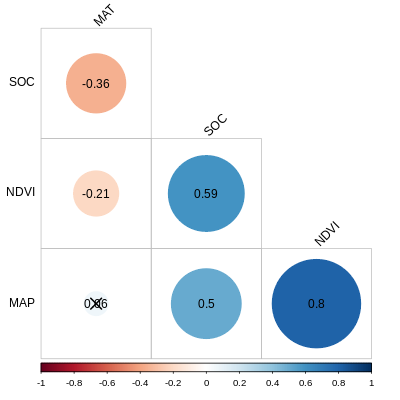

In [ ]:
%%R -w 400 -h 400 -u px
cor_mat  |>
  cor_reorder()  |>
  pull_lower_triangle() |>
  cor_plot(label = TRUE)

In above plot, insignificant correlations are marked by crosses.


##  Summary and Conclusion

The tutorial on correlation analysis in R has given you a foundation to explore relationships between variables in a dataset. You can measure the strength and direction of the relationship between two variables using correlation coefficients. With these skills, you can conduct correlation analysis on your datasets and use this foundation to explore more complex statistical techniques.



## References

1. [Correlation coefficient and correlation test in R](https://statsandr.com/blog/correlation-coefficient-and-correlation-test-in-r/)

2. [Chapter 5 Correlation and Regression Analysis in R](https://bookdown.org/siju_swamy/Stat_Lab/correlation-and-regression-analysis-in-r.html)

3. [https://www.r-bloggers.com/2021/10/pearson-correlation-in-r/](https://www.r-bloggers.com/2021/10/pearson-correlation-in-r/)

4. [Correlation rstatix](https://rpkgs.datanovia.com/rstatix/reference/cor_test.html)